# Churn Classification

Notebook ini berisikan tahapan pembuatan machine learning model untuk memprediksi customer yang churn menggunakan data yang diberikan.

Tahapan:
1. Data Identification
2. Data Preprocessing
3. EDA
4. Modelling
5. Predection

# 1. Data Identification

Import data

In [ ]:
#import dependencies
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Challenge 2/Salinan train.csv')
test = pd.read_csv('/content/drive/MyDrive/Challenge 2/Salinan test.csv')

In [ ]:
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
#print shape data
print(f"data testing: {train.shape}")
print(f"data prediction: {test.shape}")

data testing: (4250, 20)
data prediction: (750, 20)


In [ ]:
train.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
train.churn.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [ ]:
test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
test.keys()

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
test.describe()

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,100.385333,8.454667,180.454933,100.721333,30.677920,203.258267,100.273333,17.277080,199.619467,100.370667,8.982827,10.294133,4.485333,2.779933,1.634667
std,216.65064,39.699029,14.123712,53.258337,19.718539,9.053756,52.185471,19.367535,4.435638,51.531351,19.185238,2.318920,2.770340,2.421901,0.747704,1.276207
min,1.00000,1.000000,0.000000,12.500000,39.000000,2.130000,31.200000,37.000000,2.650000,50.900000,12.000000,2.290000,0.000000,0.000000,0.000000,0.000000
25%,188.25000,74.000000,0.000000,146.625000,88.000000,24.925000,166.800000,87.000000,14.177500,164.475000,88.000000,7.402500,8.525000,3.000000,2.305000,1.000000
50%,375.50000,101.000000,0.000000,178.200000,101.000000,30.295000,203.350000,101.000000,17.285000,199.450000,100.500000,8.975000,10.300000,4.000000,2.780000,1.000000
75%,562.75000,126.000000,21.000000,215.975000,114.000000,36.715000,235.975000,113.000000,20.057500,234.800000,113.000000,10.565000,12.100000,6.000000,3.270000,2.000000
max,750.00000,238.000000,51.000000,350.800000,163.000000,59.640000,363.700000,164.000000,30.910000,364.300000,168.000000,16.390000,18.900000,19.000000,5.100000,6.000000


#2. EDA

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
# membuat function untuk simple barchart pada data
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index 
  values = count.values 

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.show()

In [ ]:
train.churn.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

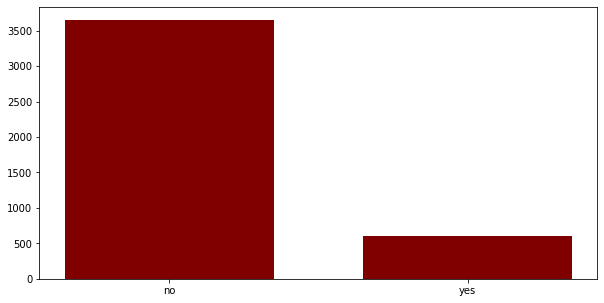

In [ ]:
bar_chart('churn')

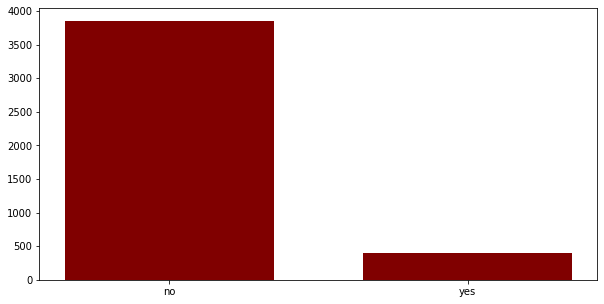

In [ ]:
bar_chart('international_plan')

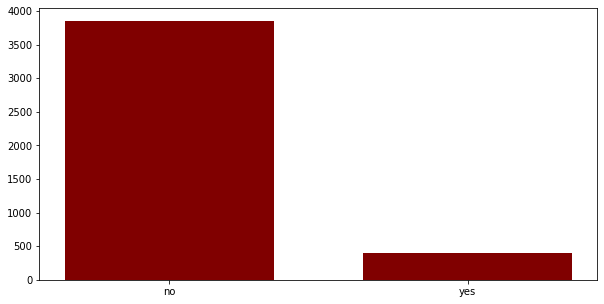

In [ ]:
bar_chart('international_plan')

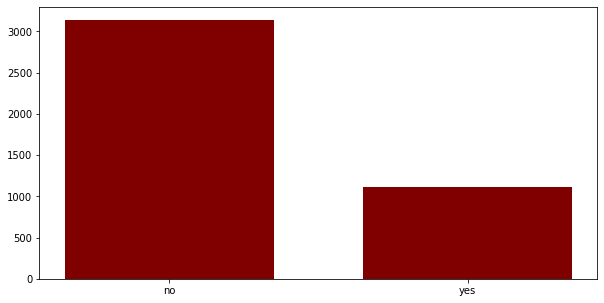

In [ ]:
bar_chart('voice_mail_plan')

In [ ]:
def grouped_barchart(col_x, col_hue):
  sns.catplot( x=col_x,
              kind="count", 
              hue=col_hue, 
              height=5, 
              aspect=1.5, 
              data=train)
  plt.xlabel(col_x, size=14)
  plt.ylabel("Count", size=14)
  plt.tight_layout()
  plt.savefig("Grouped_barplot_with_Seaborn_catplot.png")

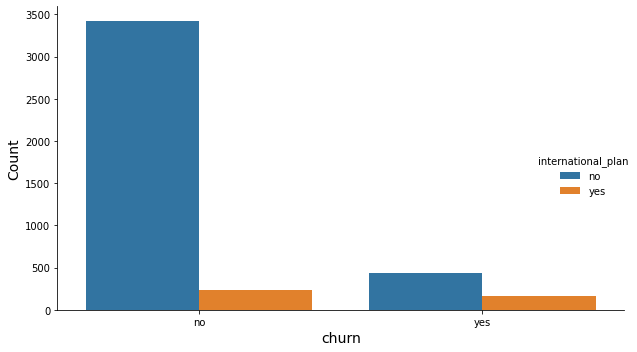

In [ ]:
grouped_barchart("churn", "international_plan")

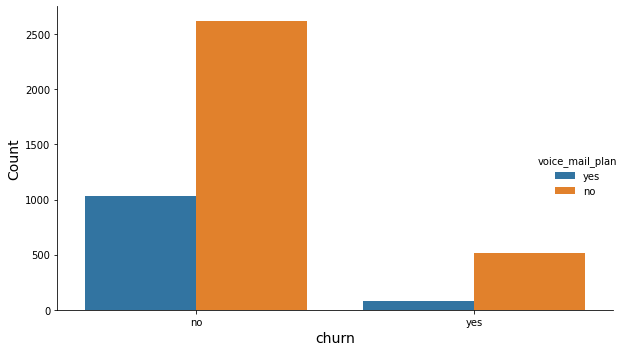

In [ ]:
grouped_barchart("churn", "voice_mail_plan")

In [ ]:
train['account_length'].describe()

count    4250.000000
mean      100.236235
std        39.698401
min         1.000000
25%        73.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

In [ ]:
train['total_day_calls'].describe()

count    4250.000000
mean       99.907294
std        19.850817
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       165.000000
Name: total_day_calls, dtype: float64

In [ ]:
train['total_day_charge'].describe()

count    4250.000000
mean       30.644682
std         9.182096
min         0.000000
25%        24.365000
50%        30.680000
75%        36.750000
max        59.760000
Name: total_day_charge, dtype: float64

# 3. Data Preprocessing

## Mengisi Missing Value

### Periksa Missing Value

In [ ]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Karena data train dan data test tidak memiliki missing value, tahapan ini dapat dilewati

## Memerika Data Duplikat

In [ ]:
train[train.duplicated()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [ ]:
test[train.duplicated()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls


Baik data train dan data test tidak memiliki data duplikat

## Drop Fitur/Kolom Yang Tidak Perlu

In [ ]:
#cek shape sebelum drop fitur
train.shape, test.shape

((4250, 20), (750, 20))

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


### Drop kolom id, state, dan area_code

karena kolom id, state, dan area_code hanya berisi data atau informasi yang tidak diperlukan untuk klasifikasi jadi tabel tersebut dapat dihapus/drop

In [ ]:
train = train.drop(['state', "area_code"], axis = 1)
test = test.drop(["id",'state', "area_code"], axis = 1 )

In [ ]:
#cek shape setelah drop fitur
train.shape, test.shape

((4250, 18), (750, 17))

In [ ]:
train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,73,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,75,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


## Menangani Outlier

In [ ]:
from scipy import stats

menangani outlier pada data train

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(train)}')

filtered_entries = np.array([True] * len(train))
for col in ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']:
    zscore = abs(stats.zscore(train[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
train = train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 4031


# 4. Modeling

sebelum melakukan modeling, encoding dan normalisasi dahulu data train dan data test

##Encoding Data Kategorikal Menjadi Numerik

### Konversi Kolom Churn Pada Data Train 

In [ ]:
#ubah atau mapping nilai kategorial pada kolom churn pada data train dengan "no" menjadi 0 dan "yes" menjadi 1
churn_mapping = {"no" : 0, "yes" : 1}
train['churn'] = train['churn'].map(churn_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,97,no,no,0,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,8.8,5,2.38,1,1
4245,83,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,73,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,75,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 0 to 4248
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4031 non-null   int64  
 1   international_plan             4031 non-null   object 
 2   voice_mail_plan                4031 non-null   object 
 3   number_vmail_messages          4031 non-null   int64  
 4   total_day_minutes              4031 non-null   float64
 5   total_day_calls                4031 non-null   int64  
 6   total_day_charge               4031 non-null   float64
 7   total_eve_minutes              4031 non-null   float64
 8   total_eve_calls                4031 non-null   int64  
 9   total_eve_charge               4031 non-null   float64
 10  total_night_minutes            4031 non-null   float64
 11  total_night_calls              4031 non-null   int64  
 12  total_night_charge             4031 non-null   f

### One Hot Encoding

convert atau encoding data kategorial pada data train dan data test menggunakan metode variable dummy 

In [ ]:
train = pd.get_dummies(train)

In [ ]:
train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,1,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,1,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,1,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,97,0,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,8.8,5,2.38,1,1,1,0,1,0
4245,83,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0,1,0,1,0
4246,73,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0,1,0,1,0
4247,75,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0,1,0,1,0


In [ ]:
test = pd.get_dummies(test)

In [ ]:
test

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1
1,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,1,1,0
2,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1,0,1,0
3,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,1,0,1,0
4,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0,1,0,1,0
746,73,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3,1,0,1,0
747,152,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1,0,1,0
748,61,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,1,0,1,0


In [ ]:
train.shape, test.shape

((4031, 20), (750, 19))

## Normalisasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
train_transform = scaler.fit_transform(train)
test_transform = scaler.fit_transform(test)

In [ ]:
train = pd.DataFrame(train_transform,columns = train.columns)
test = pd.DataFrame(test_transform,columns = test.columns)

In [ ]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
count,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000
mean,0.457795,0.159076,0.495207,0.499416,0.495227,0.497428,0.493005,0.497348,0.500956,0.498270,0.501095,0.504054,0.331307,0.503604,0.302109,0.134954,0.906475,0.093525,0.741255,0.258745
std,0.181967,0.281857,0.171062,0.168732,0.171045,0.167168,0.169524,0.167184,0.165294,0.165049,0.165228,0.159292,0.216129,0.159107,0.242184,0.341717,0.291203,0.291203,0.437999,0.437999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.376640,0.387931,0.376623,0.383642,0.379310,0.383532,0.389870,0.383333,0.390081,0.400000,0.200000,0.399103,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.453704,0.000000,0.494720,0.500000,0.494824,0.498820,0.491379,0.498810,0.500833,0.500000,0.501110,0.509091,0.300000,0.508969,0.200000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.583333,0.319149,0.611040,0.612069,0.611048,0.609781,0.612069,0.609524,0.615128,0.608333,0.615100,0.609091,0.500000,0.608744,0.400000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.419347,0.165778,0.496467,0.497753,0.496399,0.517468,0.498215,0.517590,0.474536,0.566479,0.474669,0.544663,0.236070,0.545085,0.272444,0.897333,0.102667,0.718667,0.281333
std,0.167506,0.276936,0.157429,0.159020,0.157429,0.156949,0.152500,0.156958,0.164427,0.122982,0.164462,0.146579,0.127468,0.146609,0.212701,0.303726,0.303726,0.449950,0.449950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.308017,0.000000,0.396468,0.395161,0.396366,0.407820,0.393701,0.407909,0.362396,0.487179,0.362589,0.451058,0.157895,0.451961,0.166667,1.000000,0.000000,0.000000,0.000000
50%,0.421941,0.000000,0.489802,0.500000,0.489741,0.517744,0.503937,0.517870,0.473995,0.567308,0.474113,0.544974,0.210526,0.545098,0.166667,1.000000,0.000000,1.000000,0.000000
75%,0.527426,0.411765,0.601463,0.604839,0.601374,0.615865,0.598425,0.615977,0.586790,0.647436,0.586879,0.640212,0.315789,0.641176,0.333333,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Classifier Modeling

In [ ]:
  # Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#independent dependent variables separation

train_data = train.drop("churn",axis = 1 )
target = train['churn']

In [ ]:
train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.490741,0.553191,0.43424,0.698276,0.434218,0.480944,0.517241,0.480952,0.680773,0.525000,0.680977,0.709091,0.2,0.708520,0.2,0.0,1.0,0.0,0.0,1.0
1,0.629630,0.000000,0.69600,0.620690,0.696029,0.230354,0.577586,0.230159,0.374875,0.533333,0.375278,0.618182,0.4,0.616592,0.0,0.0,1.0,0.0,1.0,0.0
2,0.384259,0.000000,0.87520,0.250000,0.875212,0.030354,0.387931,0.030159,0.489170,0.408333,0.489267,0.278788,0.6,0.278027,0.4,0.0,0.0,1.0,1.0,0.0
3,0.342593,0.000000,0.45056,0.612069,0.450593,0.321754,0.681034,0.321825,0.455848,0.675000,0.455959,0.490909,0.2,0.491031,0.6,0.0,0.0,1.0,1.0,0.0
4,0.555556,0.510638,0.61536,0.396552,0.615283,0.996965,0.560345,0.996825,0.541486,0.650000,0.541821,0.333333,0.6,0.334081,0.6,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,0.444444,0.000000,0.72544,0.405172,0.725391,0.969309,0.413793,0.969444,0.687771,0.225000,0.687639,0.412121,0.4,0.412556,0.2,1.0,1.0,0.0,1.0,0.0
4027,0.379630,0.000000,0.51968,0.241379,0.519669,0.643845,0.387931,0.643651,0.545152,0.325000,0.545522,0.503030,0.5,0.502242,0.0,0.0,1.0,0.0,1.0,0.0
4028,0.333333,0.000000,0.48640,0.405172,0.486354,0.264081,0.336207,0.263889,0.453515,0.408333,0.453738,0.575758,0.5,0.576233,0.6,0.0,1.0,0.0,1.0,0.0
4029,0.342593,0.000000,0.46336,0.508621,0.463392,0.472850,0.715517,0.472619,0.263246,0.533333,0.263509,0.296970,0.6,0.295964,0.2,0.0,1.0,0.0,1.0,0.0


In [ ]:
target

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4026    1.0
4027    0.0
4028    0.0
4029    0.0
4030    0.0
Name: churn, Length: 4031, dtype: float64

In [ ]:
train_data.shape

(4031, 19)

In [ ]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = KNeighborsClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.90954151 0.89950372 0.9044665  0.90322581 0.89205955]


In [ ]:
score.mean()

0.9017594189797092

In [ ]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.94547708 0.95905707 0.9528536  0.96526055 0.96401985]


In [ ]:
score.mean()

0.9573336285172237

In [ ]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85625774 0.87468983 0.86600496 0.88709677 0.87965261]


In [ ]:
score.mean()

0.8727403826936145

In [ ]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.91078067 0.91811414 0.89950372 0.93796526 0.90942928]


In [ ]:
score.mean()

0.9151586152185744

# 5. Prediction

In [ ]:
test.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.535865,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667,1.0,0.0,0.0,1.0
1,0.493671,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000,0.0,1.0,1.0,0.0
2,0.257384,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667,1.0,0.0,1.0,0.0
3,0.388186,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000,1.0,0.0,1.0,0.0
4,0.729958,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000,1.0,0.0,1.0,0.0


In [ ]:
clf = RandomForestClassifier()
clf.fit(train_data, target)

RandomForestClassifier()

In [ ]:
prediction = clf.predict(test)

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Challenge 2/Salinan test.csv")
submission = pd.DataFrame({
        "Id": df_test["id"],
        "churn": prediction
    })
submission

,Id,churn
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
745,746,0.0
746,747,0.0
747,748,0.0
748,749,0.0


In [ ]:
submission['churn'].value_counts()

0.0    686
1.0     64
Name: churn, dtype: int64